In [36]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import pathlib
import os
import copy
import datetime
import time

import seaborn as sns

In [5]:
df=pd.read_csv("C:\\Users\\Alya\\Documents\\CanDev\\Preprocessed_Data_with_Label.csv", sep=',',encoding='utf8')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Columns: 1660 entries, ID to DEMCODE
dtypes: int64(1660)
memory usage: 59.5 MB


In [8]:
df.head()

,ID,ANSWER1_101,ANSWER2_101,ANSWER3_101,ANSWER4_101,ANSWER5_101,ANSWER6_101,ANSWER7_101,ANSCOUNT_101,INDICATORID_101,...,ANSWER4_316,ANSWER5_316,ANSWER6_316,ANSWER7_316,ANSCOUNT_316,INDICATORID_316,SUBINDICATORID_316,LEVEL1ID,SURVEYR,DEMCODE
0,200,35,45,6,11,3,0,0,73497,4,...,7,7,2,8,73469,6,22,0,2020,2011
1,1200,41,45,5,8,2,0,0,11550,4,...,3,2,4,9,11552,6,22,1,2020,2011
2,2200,45,42,4,7,2,0,0,5626,4,...,8,7,2,9,5630,6,22,2,2020,2011
3,3200,29,48,6,12,4,0,0,7308,4,...,8,8,2,8,7308,6,22,3,2020,2011
4,4200,20,46,10,15,7,0,0,3252,4,...,13,20,2,5,3240,6,22,4,2020,2011


In [23]:
#define the label columns as answers to the questions regarding mobility: questions 163 and 164

label_columns=['ANSWER1_163', 'ANSWER2_163', 'ANSWER3_163', 'ANSWER1_164', 'ANSWER2_164', 'ANSWER3_164', 'ANSWER4_164', 'ANSWER5_164', 'ANSWER6_164']

# PCA

In [7]:
from sklearn.decomposition import PCA

## Pondérer les données en multipliant le pourcentage par le nombre de réponses

Changer les colonnes ANSWERi dans un nouveau df pondéré

In [41]:
ponderated_df=df.copy(deep=True)

for i in range (101, 317):
    for column in df.columns:
        if ("{}".format(i) in column)and ("ANSWER" in column):
            new_column=df[column]*df["ANSCOUNT_{}".format(i)] #check the syntax
            ponderated_df[column]=new_column

#ponderated_df.head()

all_columns=df.columns

#print(all_columns)

#with the anwswer counts
pond_and_counts=ponderated_df.copy(deep=True)

#delete the ANSCOUNT columns
for column in all_columns:
    if "ANSCOUNT_" in column: 
        ponderated_df.drop(column, axis=1, inplace=True)
ponderated_df.head()

,ID,ANSWER1_101,ANSWER2_101,ANSWER3_101,ANSWER4_101,ANSWER5_101,ANSWER6_101,ANSWER7_101,INDICATORID_101,SUBINDICATORID_101,...,ANSWER3_316,ANSWER4_316,ANSWER5_316,ANSWER6_316,ANSWER7_316,INDICATORID_316,SUBINDICATORID_316,LEVEL1ID,SURVEYR,DEMCODE
0,200,2572395,3307365,440982,808467,220491,0,0,4,14,...,881628,514283,514283,146938,587752,6,22,0,2020,2011
1,1200,473550,519750,57750,92400,23100,0,0,4,14,...,103968,34656,23104,46208,103968,6,22,1,2020,2011
2,2200,253170,236292,22504,39382,11252,0,0,4,14,...,78820,45040,39410,11260,50670,6,22,2,2020,2011
3,3200,211932,350784,43848,87696,29232,0,0,4,14,...,87696,58464,58464,14616,58464,6,22,3,2020,2011
4,4200,65040,149592,32520,48780,22764,0,0,4,14,...,51840,42120,64800,6480,16200,6,22,4,2020,2011


ANSWER6_164
min :  0 ; max :  37
ANSCOUNT_164
min :  0 ; max :  46938


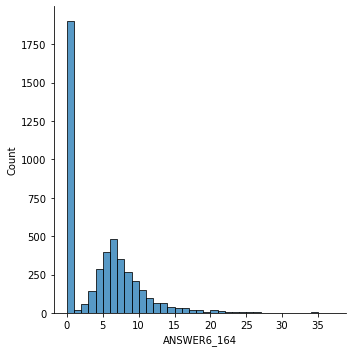

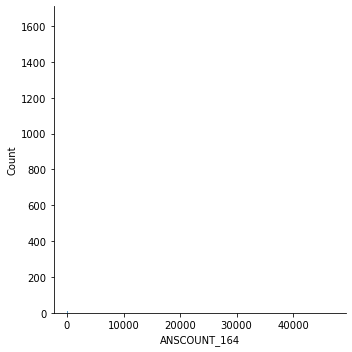

In [46]:
for col in ['ANSWER6_164']:
    print(col)
    values = (df[col].unique())
    sns.displot(data = df, x = col, binwidth=1)
    print("min : ", min(values), "; max : ", max(values))

count    4701.000000
mean      100.007658
std         0.496739
min        99.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       101.000000
dtype: float64

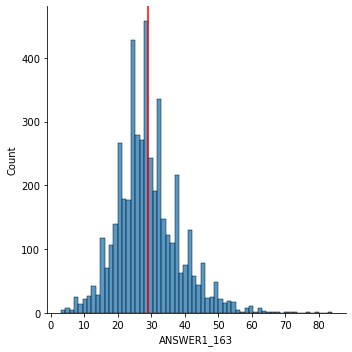

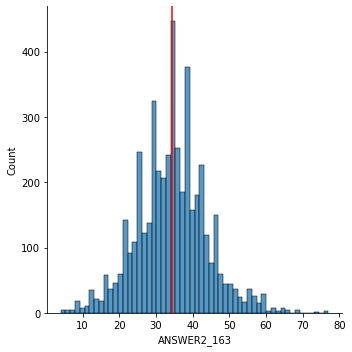

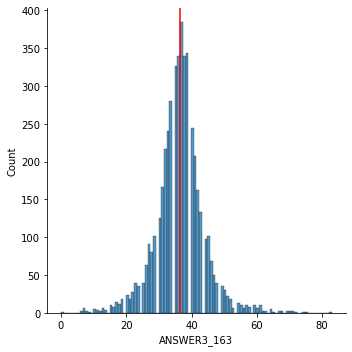

In [59]:
sns.displot(data = df, x = 'ANSWER1_163')
plt.axvline(x=df.ANSWER1_163.mean(),
            color='red')

sns.displot(data = df, x = 'ANSWER2_163')
plt.axvline(x=df.ANSWER2_163.mean(),
            color='red')

sns.displot(data = df, x = 'ANSWER3_163')
plt.axvline(x=df.ANSWER3_163.mean(),
            color='red')

df[['ANSWER1_163','ANSWER2_163','ANSWER3_163']].sum(axis=1).describe()


## Normaliser les colonnes

In [25]:
#from sklearn.preprocessing import StandardScaler

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

normalized_ponderated_df=ponderated_df.copy(deep=True)

ponderated_columns=ponderated_df.columns

for col in ponderated_columns:
    normalized_ponderated_df[col] = min_max_scaling(ponderated_df[col])


    
print(normalized_ponderated_df)

            ID  ANSWER1_101  ANSWER2_101  ANSWER3_101  ANSWER4_101  \
0     0.002100     0.378129     0.410540     0.615811     0.451594   
1     0.012597     0.069610     0.064516     0.080645     0.051613   
2     0.023095     0.037215     0.029331     0.031426     0.021998   
3     0.033593     0.031153     0.043543     0.061232     0.048985   
4     0.044091     0.009561     0.018569     0.045413     0.027248   
...        ...          ...          ...          ...          ...   
4696  0.955909     0.000000     0.000000     0.000000     0.000000   
4697  0.966407     0.000000     0.000000     0.000000     0.000000   
4698  0.976905     0.000000     0.000000     0.000000     0.000000   
4699  0.987403     0.000000     0.000000     0.000000     0.000000   
4700  0.997900     0.000000     0.000000     0.000000     0.000000   

      ANSWER5_101  ANSWER6_101  ANSWER7_101  INDICATORID_101  \
0        0.410540          0.0          0.0              1.0   
1        0.043011          0.0 

## Séparer les données en X et y

In [24]:
#define label with label=['name of column']
X_train = normalized_ponderated_df.drop(labels=label_columns, axis=1)
y_train = normalized_ponderated_df[label_columns]

X_train.head()

,ID,ANSWER1_101,ANSWER2_101,ANSWER3_101,ANSWER4_101,ANSWER5_101,ANSWER6_101,ANSWER7_101,INDICATORID_101,SUBINDICATORID_101,...,ANSWER3_316,ANSWER4_316,ANSWER5_316,ANSWER6_316,ANSWER7_316,INDICATORID_316,SUBINDICATORID_316,LEVEL1ID,SURVEYR,DEMCODE
0,0.002100,0.378129,0.410540,0.615811,0.451594,0.410540,0.0,0.0,1.0,1.0,...,0.399988,0.337027,0.303324,0.410721,0.298706,1.0,1.0,0.000000,1.0,0.971967
1,0.012597,0.069610,0.064516,0.080645,0.051613,0.043011,0.0,0.0,1.0,1.0,...,0.047169,0.022711,0.013627,0.129161,0.052838,1.0,1.0,0.010526,1.0,0.971967
2,0.023095,0.037215,0.029331,0.031426,0.021998,0.020951,0.0,0.0,1.0,1.0,...,0.035760,0.029516,0.023244,0.031474,0.025751,1.0,1.0,0.021053,1.0,0.971967
3,0.033593,0.031153,0.043543,0.061232,0.048985,0.054428,0.0,0.0,1.0,1.0,...,0.039787,0.038313,0.034482,0.040855,0.029712,1.0,1.0,0.031579,1.0,0.971967
4,0.044091,0.009561,0.018569,0.045413,0.027248,0.042385,0.0,0.0,1.0,1.0,...,0.023519,0.027603,0.038219,0.018113,0.008233,1.0,1.0,0.042105,1.0,0.971967


## Computing the PCA

In [26]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_train)


principalDf = pd.DataFrame(data = principalComponents[:,:3],#we only take the first 3 components
             columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf

,principal component 1,principal component 2,principal component 3
0,8.907754,7.658187,3.890606
1,7.787213,7.128287,2.852423
2,7.583251,7.034149,2.840696
3,7.510466,7.004447,2.868675
4,7.741699,7.123417,2.398285
...,...,...,...
4696,-1.340850,-5.519898,1.429965
4697,-1.562941,-5.600781,1.770104
4698,-1.457313,-5.575385,1.594899
4699,-1.342083,-5.520611,1.430312


In [27]:
#make a df with the labels and the values of the PCA


targets = pd.DataFrame(data = y_train,
              columns = ['type'])
finalDf = pd.concat([principalDf, targets], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,type
0,8.907754,7.658187,3.890606,NaN
1,7.787213,7.128287,2.852423,NaN
2,7.583251,7.034149,2.840696,NaN
3,7.510466,7.004447,2.868675,NaN
4,7.741699,7.123417,2.398285,NaN
...,...,...,...,...
4696,-1.340850,-5.519898,1.429965,NaN
4697,-1.562941,-5.600781,1.770104,NaN
4698,-1.457313,-5.575385,1.594899,NaN
4699,-1.342083,-5.520611,1.430312,NaN


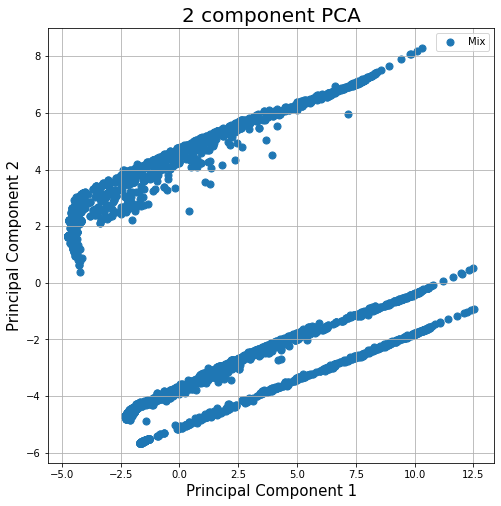

In [32]:
#Plot distribution according to component 1 and 2

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = [-1, 0, 1] #change that as well
#class_name = ['Mix', 'Non_HFT', 'HFT']#change that to left or stayed
#colors = ['r', 'g', 'b']
#for target, color in zip(targets,colors):
#    indicesToKeep = target == finalDf['type']
#    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#               , finalDf.loc[indicesToKeep, 'principal component 2']
#               , c = color
#               , s = 50)
ax.scatter(principalDf['principal component 1']
          , principalDf['principal component 2']
          , s = 50)

ax.legend(class_name)
ax.grid()



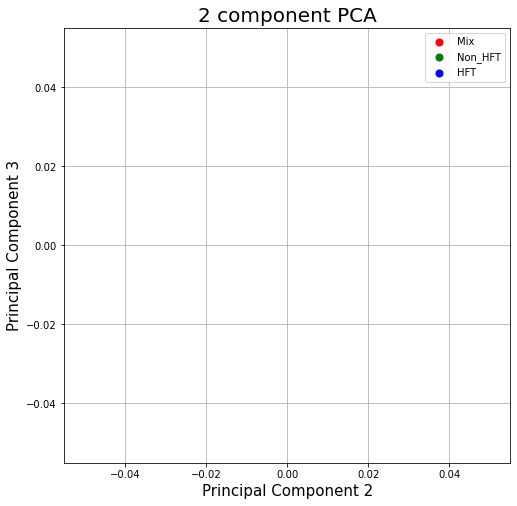

In [29]:
#Plot distribution according to component 2 and 3

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = target == finalDf['type']
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(class_name)
ax.grid()

In [ ]:
#Plot distribution according to component 2 and 3

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = target == finalDf['type']
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(class_name)
ax.grid()

#could maybe have done all that with Seaborne

In [ ]:
#Plotting PCA results in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

targets = [-1, 0, 1]
class_name = ['Mix', 'Non_HFT', 'HFT']
colors = ['r', 'g', 'b']


for target, color in zip(targets,colors):
    indicesToKeep = target == finalDf['type']
    ax.text3D(finalDf.loc[indicesToKeep, 'principal component 1'].mean(),
              finalDf.loc[indicesToKeep, 'principal component 2'].mean() + 1.5,
              finalDf.loc[indicesToKeep, 'principal component 3'].mean(), class_name[target],
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = finalDf['type']

ax.scatter(finalDf.loc[:, 'principal component 1'], finalDf.loc[:, 'principal component 2'], finalDf.loc[:, 'principal component 3'], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
#Plot explained variance ratio per component
plt.plot(pca.explained_variance_ratio_, ".-")
plt.title("Explained Variance Ratio per Component")
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

### Percentage of Explained variance by the 3 first components:

In [ ]:
print("Percentage of explained variance of the first three components is qual to : {}".format(np.sum(pca.explained_variance_ratio_[:3])))

### First three components are made of:

In [ ]:
three_comp = pd.DataFrame(data =pca.components_[:3], columns = X_train.columns)
three_comp